### PART 0 : Exploration Data Analysis

In [23]:
# Loading librairie needed
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns in the .head()
pd.options.display.max_columns = 1000 

# To hide warning log
import warnings
warnings.filterwarnings('ignore')

In [24]:
# Loading dataset
dataset = pd.read_csv('src/Speed_Dating_Data.csv', encoding='ISO-8859-1')

In [25]:
# Visualize the 5 first rows
dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [26]:
# Checking the initial shape of the dataset
dataset.shape

(8378, 195)

In [27]:
# Getting all the columns names
dataset.columns.to_list()

['iid',
 'id',
 'gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'positin1',
 'order',
 'partner',
 'pid',
 'match',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'dec_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field',
 'field_cd',
 'undergra',
 'mn_sat',
 'tuition',
 'race',
 'imprace',
 'imprelig',
 'from',
 'zipcode',
 'income',
 'goal',
 'date',
 'go_out',
 'career',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'expnum',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 

CREATION OF A DATAFRAME TO KNOW THE PROFIL OF THE 552 CANDIDATES

In [28]:
# Creating a list of usefull columns for this analysis
usefull_col =['iid',
            'gender',
            'condtn',
            'age',
            'imprace',
            'imprelig',
            'from',                                                                     ### FAIRE UN GRAPHIQUE MAPP AVEC ¨PLOTLY'
            'goal',
            'date',
            'exphappy',
            'expnum',
            'go_out']

In [29]:
# Creating a dataframe with only usefull_col
df = pd.DataFrame(data=dataset, columns=usefull_col)

In [30]:
# Checking the shape
df.shape

(8378, 12)

MISSING VALUES MANAGEMENT

In [31]:
# Checking the missing values
df.isna().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
8373    1
8374    1
8375    1
8376    1
8377    1
Length: 8378, dtype: int64

In [32]:
# Groupby idd to get one row for 1 people with minimum of NaN values
df = df.loc[df.isnull().sum(axis=1).groupby(df.iid).idxmin(),:]


In [33]:
# Checking the shape
df.shape

(551, 12)

In [34]:
df.isnull().sum()

iid           0
gender        0
condtn        0
age           8
imprace       7
imprelig      7
from          7
goal          7
date          8
exphappy      8
expnum      425
go_out        7
dtype: int64

In [35]:
age_mean=df["age"].mean()

In [36]:
df["age"].fillna(value=age_mean, inplace=True)


In [37]:
df["imprace"].value_counts()

1.0     189
3.0      65
2.0      60
5.0      43
8.0      42
7.0      35
6.0      34
4.0      33
9.0      25
10.0     17
0.0       1
Name: imprace, dtype: int64

In [38]:
df["imprace"].fillna(value=1, inplace=True)

In [39]:
df["imprelig"].value_counts()

1.0     206
3.0      62
2.0      53
5.0      48
6.0      38
4.0      35
8.0      33
7.0      31
10.0     20
9.0      18
Name: imprelig, dtype: int64

In [40]:
df["imprelig"].fillna(value=1, inplace=True)

In [41]:
df["from"].value_counts()

New York             36
New Jersey           24
California           21
China                 8
Boston                8
                     ..
Cameroon              1
Bulgaria              1
Alabama               1
Russia/Germany        1
London & New York     1
Name: from, Length: 269, dtype: int64

In [42]:
df["from"].fillna(value=1, inplace=True)

In [43]:
df["goal"].value_counts()

1.0    228
2.0    189
3.0     40
5.0     35
6.0     30
4.0     22
Name: goal, dtype: int64

In [44]:
df["goal"].fillna(value=1 , inplace=True)

In [45]:
df["go_out"].value_counts()

2.0    191
1.0    177
3.0    127
4.0     29
5.0     12
6.0      6
7.0      2
Name: go_out, dtype: int64

In [46]:
df["go_out"].fillna(value=2 , inplace=True)

In [47]:
df.isnull().sum()

iid           0
gender        0
condtn        0
age           0
imprace       0
imprelig      0
from          0
goal          0
date          8
exphappy      8
expnum      425
go_out        0
dtype: int64

REMPLACEMENT DES NUMERO PAR LE TEXTE ASSOSCIE

In [48]:
df.head()

,iid,gender,condtn,age,imprace,imprelig,from,goal,date,exphappy,expnum,go_out
0,1,0,1,21.0,2.0,4.0,Chicago,2.0,7.0,3.0,2.0,1.0
10,2,0,1,24.0,2.0,5.0,Alabama,1.0,5.0,4.0,5.0,1.0
20,3,0,1,25.0,8.0,4.0,Connecticut,6.0,3.0,4.0,2.0,1.0
30,4,0,1,23.0,1.0,1.0,Texas,1.0,5.0,1.0,2.0,1.0
40,5,0,1,21.0,8.0,1.0,Bowdoin College,2.0,4.0,7.0,10.0,1.0


In [49]:
df["gender"] = df["gender"].apply(lambda x : "Male" if x==1 else "Female")

In [50]:
df["condtn"] = df["condtn"].apply(lambda x : "limited_choice" if x==1 else "extensive_choice")

In [51]:
df["goal"] = df["goal"].apply(lambda x : "Seemed like a fun night out" if x ==1 
                                    else("To meet new people" if x ==2 
                                    else( "To get a date" if x == 3 
                                    else("Looking for a serious relationship" if x==4 
                                    else("To say I did it" if x ==5 
                                    else "Other"
                                            )))))


In [52]:
df["date"] = df["date"].apply(lambda x : "Several times a week" if x ==1 
                                    else("Twice a week" if x ==2 
                                    else("Once a week" if x == 3 
                                    else("Twice a month" if x==4 
                                    else("Once a month" if x ==5 
                                    else("Several times a year" if x ==5
                                    else "Almost never"
                                            ))))))

In [53]:
df["go_out"] = df["go_out"].apply(lambda x : "Several times a week" if x ==1 
                                    else("Twice a week" if x ==2 
                                    else("Once a week" if x == 3 
                                    else("Twice a month" if x==4 
                                    else("Once a month" if x ==5 
                                    else("Several times a year" if x ==5
                                    else "Almost never"
                                            ))))))

DATA VISUALIZATION ANALYSIS

In [54]:
df.head()

,iid,gender,condtn,age,imprace,imprelig,from,goal,date,exphappy,expnum,go_out
0,1,Female,limited_choice,21.0,2.0,4.0,Chicago,To meet new people,Almost never,3.0,2.0,Several times a week
10,2,Female,limited_choice,24.0,2.0,5.0,Alabama,Seemed like a fun night out,Once a month,4.0,5.0,Several times a week
20,3,Female,limited_choice,25.0,8.0,4.0,Connecticut,Other,Once a week,4.0,2.0,Several times a week
30,4,Female,limited_choice,23.0,1.0,1.0,Texas,Seemed like a fun night out,Once a month,1.0,2.0,Several times a week
40,5,Female,limited_choice,21.0,8.0,1.0,Bowdoin College,To meet new people,Twice a month,7.0,10.0,Several times a week


Text(0.5, 1.0, 'Gender repartition')

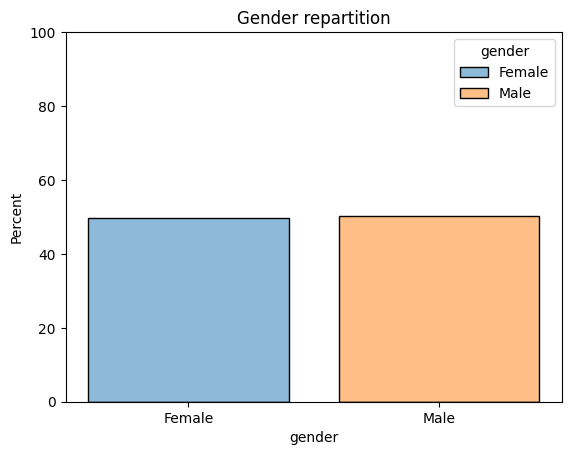

In [55]:
ax1 = sns.histplot(data = df, x = 'gender', stat= "percent", shrink = 0.8, hue='gender')
ax1.set_ylim(0,100)
ax1.set_title("Gender repartition")

Text(0.5, 1.0, 'Choice repartition')

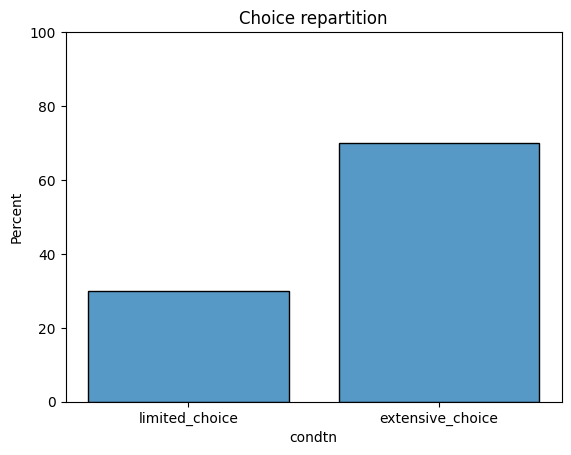

In [56]:
ax2 = sns.histplot(data = df, x = "condtn",stat= "percent", shrink = 0.8)
ax2.set_ylim(0,100)
ax2.set_title("Choice repartition")

Text(0.5, 1.0, 'Age repartition')

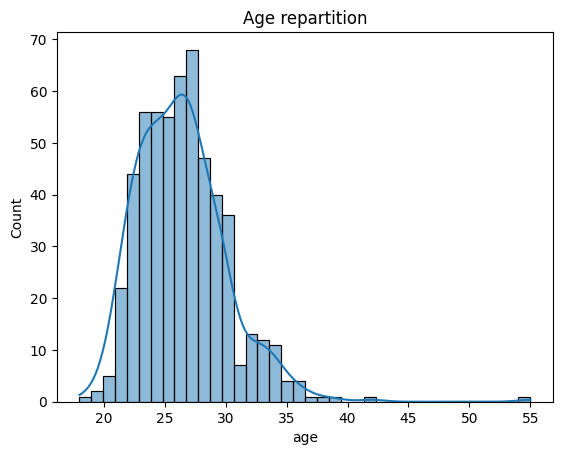

In [57]:
ax3=sns.histplot(data = df, x = "age", kde=True)
ax3.set_title("Age repartition")

(0.0, 10.0)

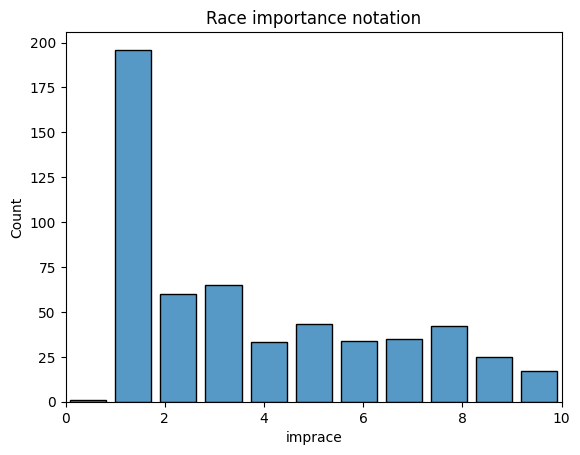

In [58]:
ax4 = sns.histplot(data = df, x = "imprace", shrink = 0.8)
ax4.set_title("Race importance notation")
ax4.set_xlim(0,10)

Text(0.5, 1.0, 'Religion importance rate')

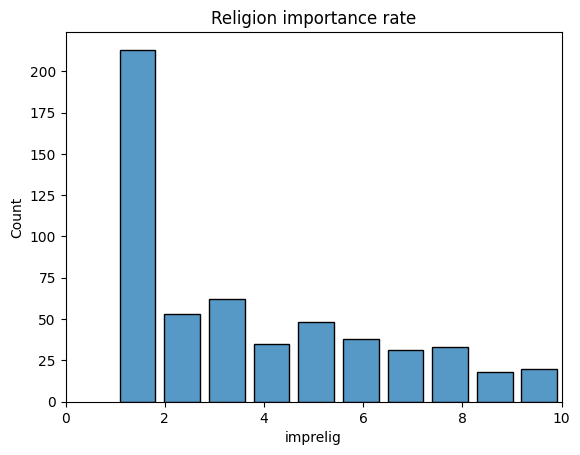

In [59]:
ax5 = sns.histplot(data = df, x= "imprelig", shrink = 0.8, bins=10 )
ax5.set_xlim(0,10)
ax5.set_title("Religion importance rate")


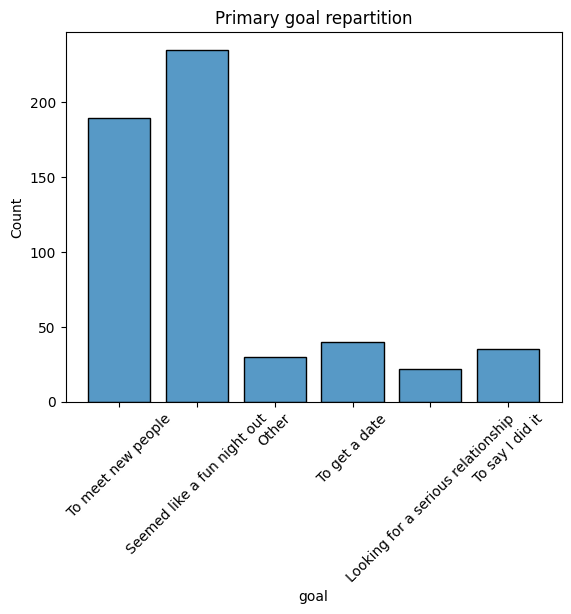

In [60]:
order6 = ["Several times a week","Twice a week", "Once a week", "Twice a month", "Once a month", "Almost never"]


ax6 = sns.histplot(data = df, x = 'goal', shrink = 0.8)
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45)
ax6.set_title("Primary goal repartition");

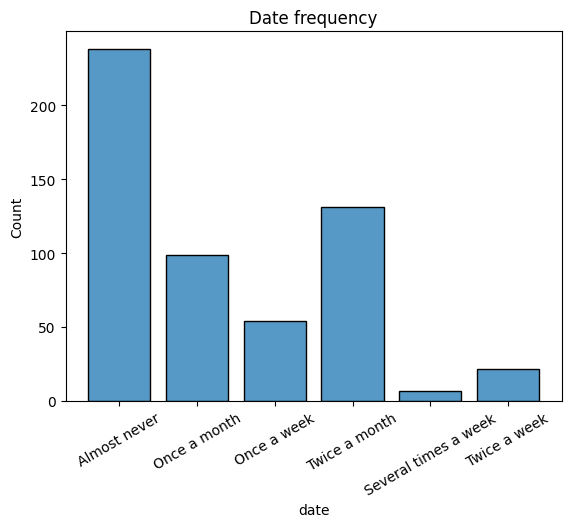

In [61]:
ax7 = sns.histplot(data = df, x = "date", shrink = 0.8)
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=30);
ax7.set_title("Date frequency");

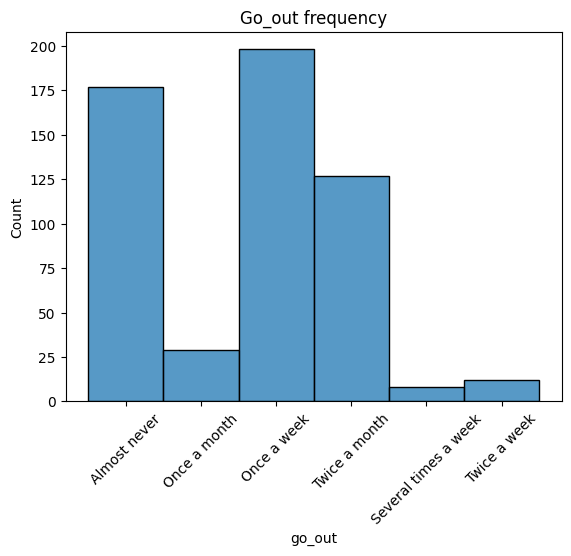

In [62]:
ax8 = sns.histplot(data = df, x = 'go_out')
ax8.set_xticklabels(ax7.get_xticklabels(), rotation=45);
ax8.set_title("Go_out frequency");

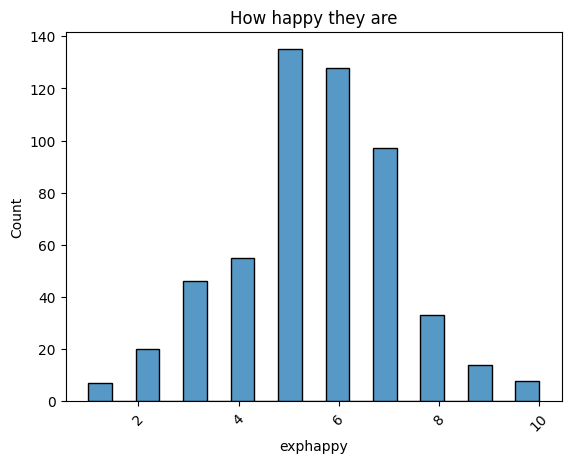

In [63]:
ax9 = sns.histplot(data = df, x = 'exphappy')
ax9.set_xticklabels(ax9.get_xticklabels(), rotation=45);
ax9.set_title("How happy they are");

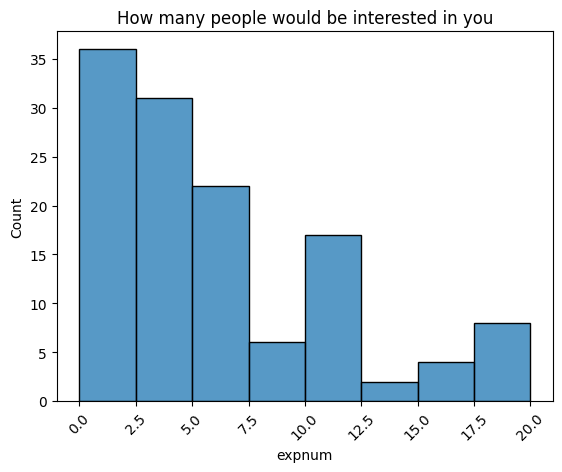

In [67]:
ax10 = sns.histplot(data = df, x = 'expnum')
ax10.set_xticklabels(ax10.get_xticklabels(), rotation=45)
ax10.set_title("How many people would be interested in you");

In [64]:
import plotly.express as px                                                                                      ## TROUVER UN MOYEN DE FAIRE UNE VISUALIZATION GRAPHIQUE AVEC PLOTLY

fig = px.scatter_geo(df, locations="from",
                     hover_name="from",
                     projection="natural earth")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Conclusion